In [ ]:
pip install -q -U transformers>=4.41.0

In [ ]:
pip install -q bitsandbytes==0.41.3

In [ ]:
pip install accelerate>=0.26.0

In [ ]:
pip install --upgrade accelerate

In [ ]:
!pip install transformers==4.45.2

In [ ]:
!pip install bitsandbytes --upgrade

In [ ]:
!pip install --upgrade timm

In [7]:
import tokenizers
print(tokenizers.__version__)

0.20.3


In [8]:
import accelerate
print(accelerate.__version__)

1.4.0


In [1]:
import transformers
print(transformers.__version__)

4.45.2


In [9]:
import timm
print(timm.__version__)

1.0.15


In [10]:
import pkg_resources

try:
   bitsandbytes_version = pkg_resources.get_distribution("bitsandbytes").version
   print(f"bitsandbytes version: {bitsandbytes_version}")
except pkg_resources.DistributionNotFound:
   print("bitsandbytes is not installed.")

bitsandbytes version: 0.45.3


/tmp/ipykernel_26529/3935703945.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
# image

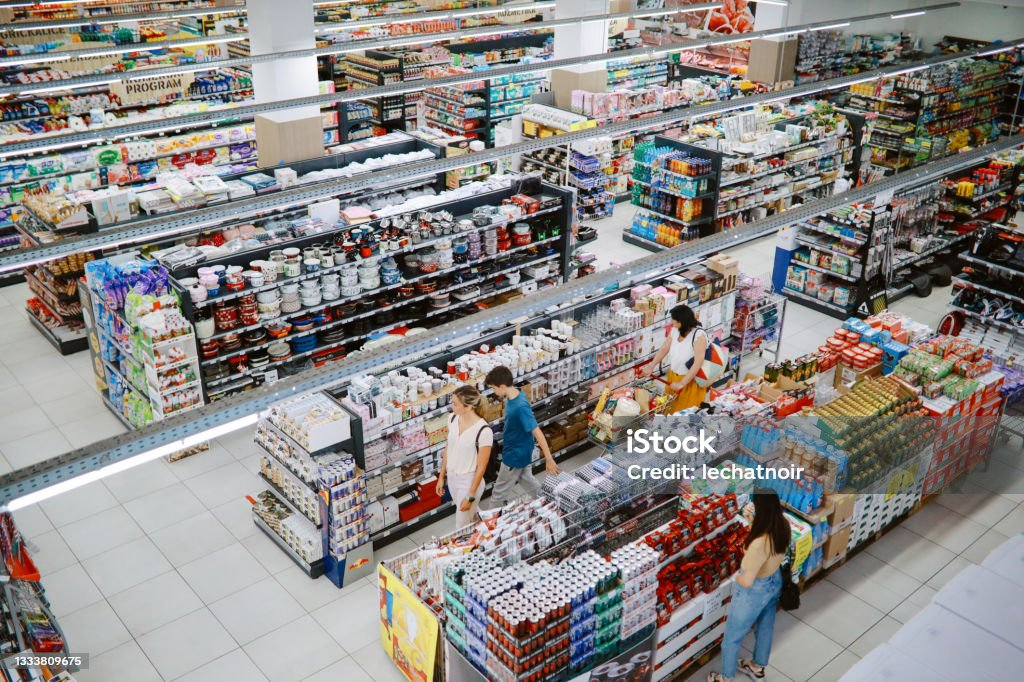

In [13]:
import requests
from PIL import Image

image_path = "store_image.jpg"
image = Image.open(image_path).convert('RGB')
image

In [14]:
import torch
from transformers import BitsAndBytesConfig, pipeline

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [15]:
model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
max_new_tokens = 1000
prompt = "USER: <image>\nWhat are the things I should be cautious about when I visit this place?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


In [16]:
max_new_tokens = 200
prompt = "USER: <image>\nHow many men and women do you see in the image and what products are they looking at?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [17]:
print(outputs[0]["generated_text"])

USER:  
How many men and women do you see in the image and what products are they looking at?
ASSISTANT: In the image, there are two men and two women. They are looking at various products, including bottles and cans, which are displayed in the store.
